In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

RESULTS_INPUT = 'results.csv'
ACTUAL_INPUT = 'actual.xlsx'

### Reading data

In [15]:
actual = pd.read_excel(ACTUAL_INPUT)
predicted = pd.read_csv(RESULTS_INPUT)
actual = actual[['full name', 'Right', 'Left']]
actual = actual.rename(index=str, columns={"Right": "actual_right",
                                  "Left": "actual_left"})
predicted = predicted.rename(index=str, columns={"right_wing (mm)": "predicted_right",
                                     "left_wing (mm)": "predicted_left"})

### Merging togeter 

Creating new columns for the difference in predicted - actual wing length

In [28]:
both = pd.merge(actual, predicted, left_on = 'full name',
                right_on = 'image_id').drop(['image_id'], axis=1)
both['left_diff'] = both['predicted_left'] - both['actual_left']
both['right_diff'] = both['predicted_right'] - both['actual_right']
all_diffs = both['right_diff'].append(both['left_diff'])
both['sum_diff'] = abs(both['right_diff']) + abs(both['left_diff'])
both.loc[both['sum_diff'] < 4].sort_values(by=['sum_diff'], ascending=False).head()

,full name,actual_right,actual_left,predicted_left,predicted_right,left_diff,right_diff,sum_diff
352,BMNHE_1355391.JPG,11.866,11.233,13.46,11.19,2.227,-0.676,2.903
380,BMNHE_1355482.JPG,13.271,12.985,12.40,11.02,-0.585,-2.251,2.836
212,BMNHE_1354037.JPG,14.890,14.138,16.47,14.64,2.332,-0.250,2.582
57,BMNHE_1356800.JPG,13.546,13.400,15.45,13.05,2.050,-0.496,2.546
434,BMNHE_1355347.JPG,13.445,13.009,12.17,12.00,-0.839,-1.445,2.284


### Calculating stats about data 

Finds the mean and SD and removes all outliers (+/- 2 SD from the mean)

In [18]:
mean = np.mean(all_diffs)
sd = np.std(all_diffs)
lower = mean - 2 * sd
upper = mean + 2 * sd
print("Mean: {mean} SD: {sd}.".format(mean=mean, sd=sd))
print("Lower: {lower} Upper: {upper}.".format(lower=lower, upper=upper))

Mean: -0.038746450304259654 SD: 2.160263926435517.
Lower: -4.359274303175293 Upper: 4.281781402566774.


In [20]:
outliers = all_diffs[(all_diffs < lower) | (all_diffs > upper)]
print("Num outliers: {outliers}".format(outliers=len(outliers)))
all_diffs = all_diffs[(all_diffs > lower) & (all_diffs < upper)]

Num outliers: 0


### Plotting

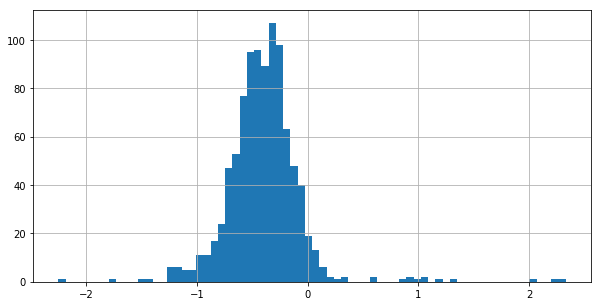

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = all_diffs.hist(bins='auto')

In [22]:
# filename = 'result_plot.png'# output_path = os.path.normpath(filename)
# plt.xlabel('Difference between (predicted - actual) in mm')
# start, end = ax.get_xlim()
# plt.ylabel('Number of samples')
# plt.title('Error in predicted length')
# plt.savefig(output_path)
# plt.close()